In [2]:
import pandas as pd
df = pd.read_csv('c:/data/customer/customer.csv')
df.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [4]:
cols = df.columns[:-1]
X = df[cols]
y = df['Churn']
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [5]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Churn'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp['Churn'].value_counts()

0    483
1    483
Name: Churn, dtype: int64

In [6]:
X = df_samp[cols]
y = df_samp['Churn']

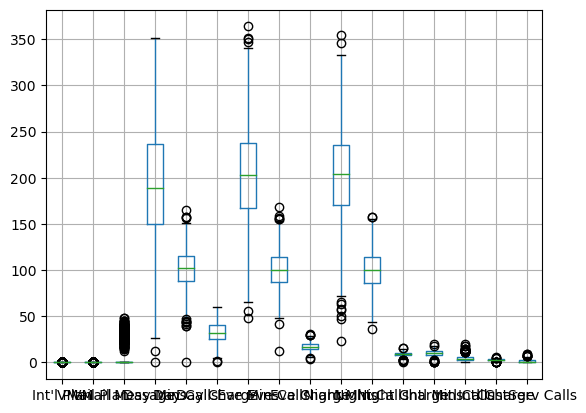

In [11]:
import matplotlib.pyplot as plt
X.boxplot()
plt.show()

In [7]:
#스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))

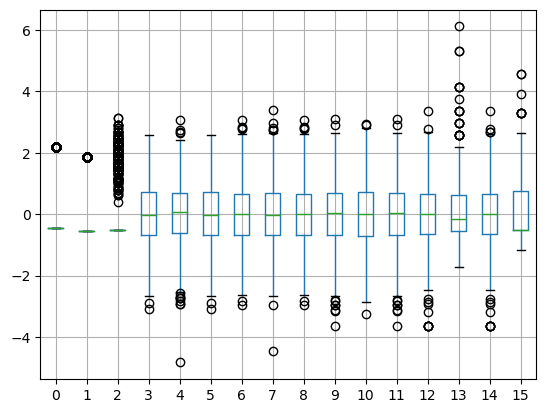

In [13]:
X_scaled.boxplot()
plt.show()

In [23]:
#모형을 만드는데 사용된 변수들의 특성 중요도(트리 알고리즘에 더 적합)
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import numpy as np
rf = RandomForestClassifier(random_state=0).fit(X, y)
result = permutation_importance(rf, X, y, n_repeats=10, 
                                random_state=0, n_jobs=-1)
importances = np.array(list(zip(X.columns, result.importances_mean)))

In [24]:
df2 = pd.DataFrame(importances, columns=['variable', 'importance'])
df2.sort_values('importance',ascending=False)

,variable,importance
15,CustServ Calls,0.1571428571428571
0,Int'l Plan,0.09679089026915115
5,Day Charge,0.05786749482401656
3,Day Mins,0.04886128364389233
13,Intl Calls,0.02204968944099379
6,Eve Mins,0.021635610766045543
8,Eve Charge,0.02142857142857142
10,Night Calls,0.013975155279503127
4,Day Calls,0.01314699792960664
7,Eve Calls,0.009109730848861287


In [25]:
from sklearn.svm import SVC
svm = SVC(random_state=0).fit(X, y)
result = permutation_importance(svm, X, y, n_repeats=10, 
                                random_state=0, n_jobs=-1)
importances = np.array(list(zip(X.columns, result.importances_mean)))

In [26]:
df3 = pd.DataFrame(importances, columns=['variable', 'importance'])
df3.sort_values('importance',ascending=False)

,variable,importance
3,Day Mins,0.15186335403726708
6,Eve Mins,0.052380952380952375
12,Intl Mins,0.003209109730848847
10,Night Calls,0.0026915113871635588
9,Night Mins,0.0025879917184264967
4,Day Calls,0.0025879917184264854
2,VMail Message,0.0023809523809523725
7,Eve Calls,0.002277432712215344
13,Intl Calls,0.001138716356107683
15,CustServ Calls,0.001138716356107683


In [9]:
sorted_idx = result.importances_mean.argsort()
print(importances[sorted_idx[::-1]]) # 배열의 역순

[['Day Mins' '0.15186335403726708']
 ['Eve Mins' '0.052380952380952375']
 ['Intl Mins' '0.003209109730848847']
 ['Night Calls' '0.0026915113871635588']
 ['Night Mins' '0.0025879917184264967']
 ['Day Calls' '0.0025879917184264854']
 ['VMail Message' '0.0023809523809523725']
 ['Eve Calls' '0.002277432712215344']
 ['CustServ Calls' '0.001138716356107683']
 ['Intl Calls' '0.001138716356107683']
 ['Intl Charge' '0.0010351966873706209']
 ['Eve Charge' '0.0008281573498964967']
 ['Day Charge' '0.00041407867494823724']
 ['Night Charge' '0.0']
 ['VMail Plan' '0.0']
 ["Int'l Plan" '0.0']]
